In [176]:
#1. import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1. **Preparing and loading the data**

In [177]:
#2. Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Also I used diabetes_data.sample() because .sample() picksa up rows randomly that's why we get non bised view. Now we can see data types and brief statistical summary.

1.  **Basic EDA and Statistical Analysis**

In [178]:
#4. Getting dataframe columns names
df_name=diabetes_data.columns

In [179]:
#11. to Count zero entries
print("Count of zero entries") 
colsToModify = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',]
val = []
for col in colsToModify:
  val.append(len(diabetes_data[diabetes_data[col] == 0]))
zeroCount = pd.DataFrame(val, index = colsToModify, columns = ['zeroCount'])
zeroCount

Count of zero entries


,zeroCount
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [180]:
#13. Replacing zero value with respective mean vale
for col in colsToModify:
    diabetes_data[col] = diabetes_data[col].replace(0,np.NaN)
    mean = int(diabetes_data[col].mean(skipna = True))
    diabetes_data[col] = diabetes_data[col].replace(np.NaN, mean)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [181]:
#15. Menampilkan deskripsi statistik setelah penggantian nilai nol 
diabetes_data.duplicated().sum()

0

3. **Data Visuliation**

array([<Axes: ylabel='count'>], dtype=object)

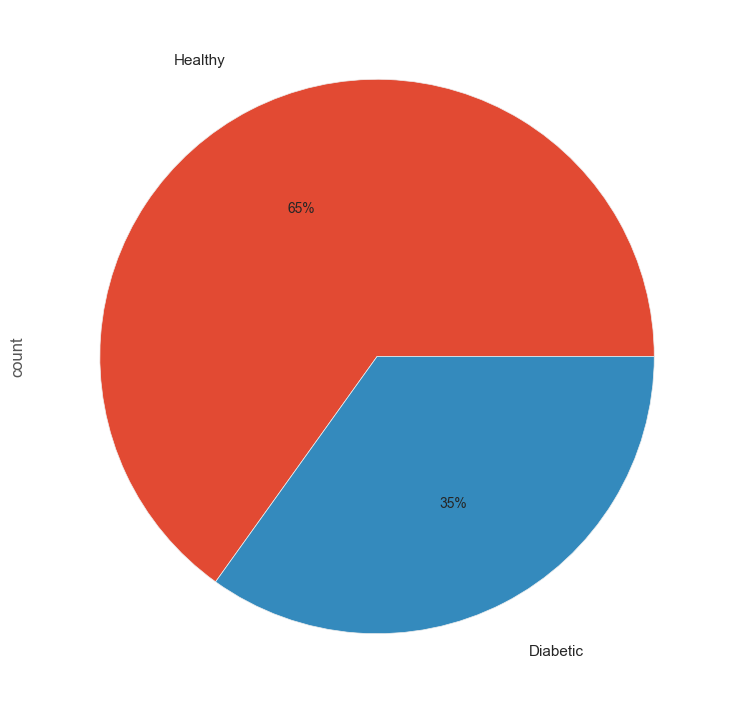

In [182]:
#18. Import library untuk plotting (Matplotlib Style) 
import matplotlib.style as style
style.available

style.use('ggplot')
labels = ["Healthy", "Diabetic"]
diabetes_data['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

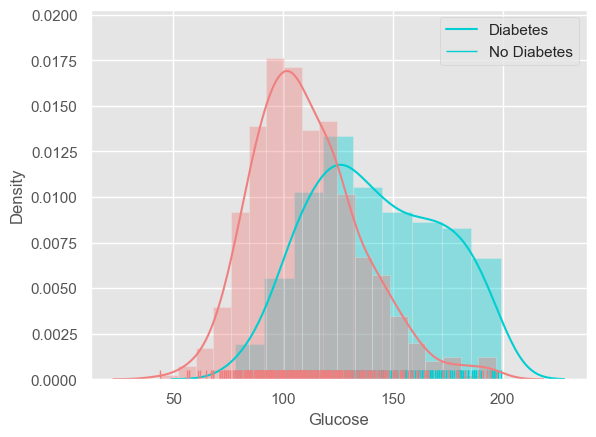

In [183]:
#24. 
plt.figure()
ax = sns.distplot(diabetes_data['Glucose'][diabetes_data.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(diabetes_data['Glucose'][diabetes_data.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

**4. Outlier Detection**

from the visulization above 

1. **Suplitting The Data**

In [184]:
#27 Import library train_test_split dari sklearn 
from sklearn.model_selection import train_test_split
X =diabetes_data.iloc[:,0:8]
y =diabetes_data.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21, stratify = y)

In [185]:
#28. feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
#29. 	Import library KNeighborsClassifier dari sklearn 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23, p=2, metric='euclidean')

In [187]:
#30. Melatih model KNN dengan data training 
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [188]:
#31. Memprediksi data uji dengan model KNN 
y_pred =  classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [189]:
#32.Import confusion_matrix dari sklearn untuk evaluasi  
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[90, 10],
       [32, 22]], dtype=int64)

In [190]:
#33. Import accuracy_score dari sklearn untuk evaluasi 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7272727272727273


In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 30)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_gscv.fit(X_train, y_train)

# Best parameter
print("Best n_neighbors:", knn_gscv.best_params_)

# Use the best model
best_knn = knn_gscv.best_estimator_

# Predict
y_pred = best_knn.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

Best n_neighbors: {'n_neighbors': 19}
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       100
           1       0.68      0.39      0.49        54

    accuracy                           0.72       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.72      0.70       154



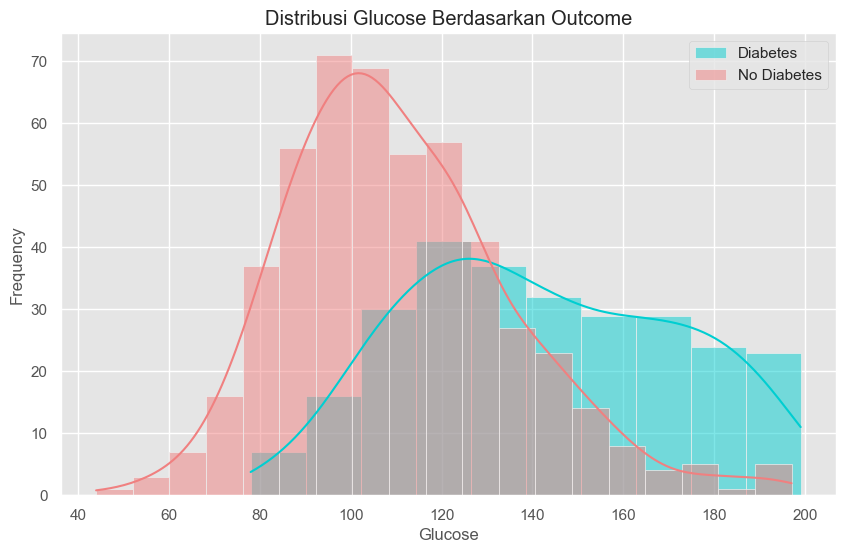

In [192]:
# Visualisasi distribusi Glucose untuk kedua kelompok
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_data['Glucose'][diabetes_data['Outcome'] == 1], color="darkturquoise", label='Diabetes', kde=True)
sns.histplot(diabetes_data['Glucose'][diabetes_data['Outcome'] == 0], color="lightcoral", label='No Diabetes', kde=True)
plt.legend()
plt.title('Distribusi Glucose Berdasarkan Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

In [193]:
#34. save model using joblib
from joblib import dump
import sklearn
print(sklearn.__version__)


# Save trained model using joblib
dump(classifier, 'knn_diabetes_model.joblib')


1.3.0


['knn_diabetes_model.joblib']

In [194]:
# 39. Code to collect accuracy as list for several k values, Mengumpulkan akurasi model untuk beberapa nilai K 
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn, feat ,y_train, cv=8)
  accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

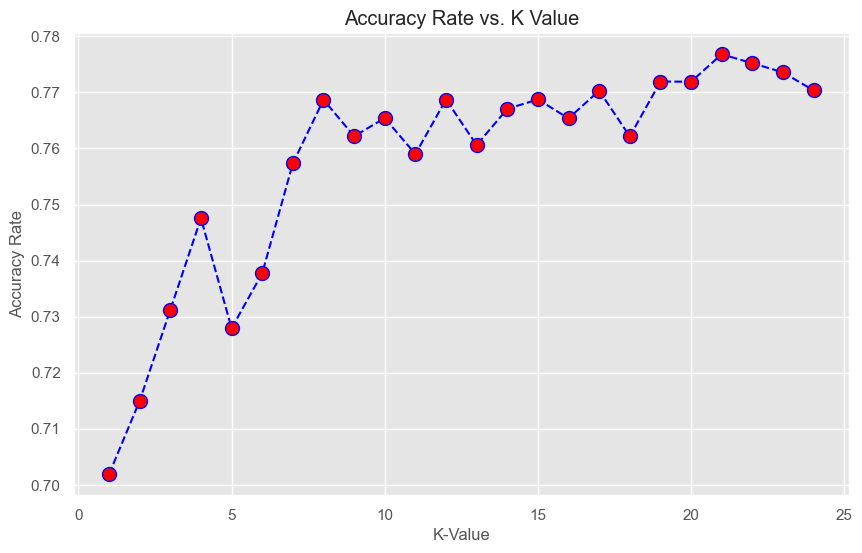

In [195]:
#40. Code to plot accuracy against that k
plt.figure(figsize=(10,6))

plt.plot(range(1,25),accuracy_rate,color='blue', linest yle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Rate')

In [196]:
#41. Like accuracy we can have plot for error rate also.
error_rate = []
for i in range(1,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn, feat, y_train, cv=9)
  error_rate.append(1-score.mean())

**In this kernel, we have performed Exploratory Data Analysis, Data Preprocessing, Visualization of Features, and KNN Model Building. Please give an upvote, if you like & find this kernel helpful. Thank You.** 

In [197]:
!pip install streamlit